기울기(상관계수):  [0.20259144]
평균 오차:  55.49
r2 스코어:  0.94


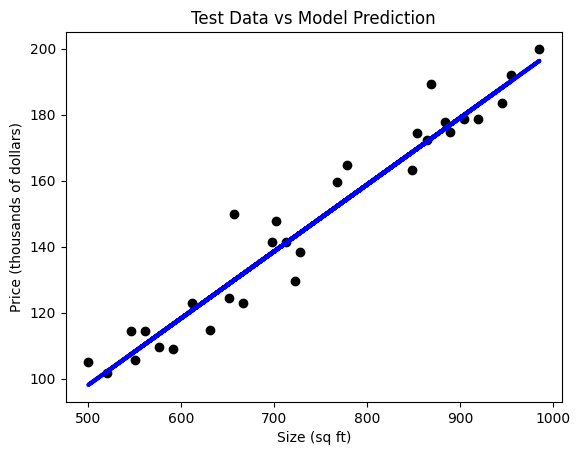

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = {'Size': np.linspace(500,1000,100)}
df = pd.DataFrame(data)

np.random.seed(42)
# 오차 = noise
noise = np.random.normal(0, 10, len(df['Size']))

df['Price'] = df['Size'] * 0.2 + noise

X = df[['Size']]
# df[['Size']]는 'Size' 열을 선택하여 데이터프레임 형태로 유지합니다.
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("기울기(상관계수): ", model.coef_)
print("평균 오차: ", mean_squared_error(y_test, y_pred).round(2))
print("r2 스코어: ", r2_score(y_test, y_pred).round(2))
# R-squared 값은 0에서 1까지의 범위를 가지며, 높은 값일수록 모델이 데이터를 잘 설명하고 예측하는 데 높은 성능을 보입니다.

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (thousands of dollars)')
plt.title('Test Data vs Model Prediction')
plt.show()

### 회귀 모델 평가

#### 평균 제곱 오차 (MSE):
- MSE는 추정값과 실제값의 차이를 제곱하여 평균화한 값으로, 모델의 성능을 측정하는 지표입니다.
- 낮은 MSE 값은 모델이 데이터를 얼마나 잘 예측하는지를 나타냅니다. 그러나 이상값에 민감할 수 있습니다.

#### 제곱 평균 오차의 제곱근 (RMSE):
- RMSE는 MSE의 제곱근으로, 추정값과 실제값의 차이를 제곱하고 평균화한 후 다시 제곱근을 취한 값입니다.
- RMSE는 추정값과 실제값의 크기 단위가 동일하며, 큰 오류에 높은 가중치를 부여하여 큰 오류가 덜 바람직한 경우에 유용합니다.

#### 평균 절대 오차 (MAE):
- MAE는 추정값과 실제값의 절대값 차이의 평균을 나타내는 지표로, 방향을 고려하지 않습니다.
- MSE 및 RMSE에 비해 이상값에 덜 민감하며, 모든 오차를 동일하게 취급합니다.

#### RMSE vs MAE:
- MAE는 모든 오차를 절대값으로 취급하고, 이를 단순히 평균한 것입니다. 크기에 관계없이 같은 가중치를 부여합니다.
- RMSE는 오차를 제곱하여 가중치를 큰 오류에 부여합니다. 이는 큰 오류나 이상값에 더 민감하게 반응합니다.

#### R 제곱 (결정 계수):
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정합니다.
- 값의 범위는 0부터 1까지이며, 1에 가까울수록 모델이 데이터를 더 잘 설명한다는 것을 나타냅니다.
- 단독으로 사용할 때는 과적합을 고려해야 하며, 변수의 수에 따라 R-제곱을 조정한 수정된 R-제곱이 유용합니다.

#### 수정된 R-제곱:
- 수정된 R-제곱은 독립 변수의 수를 고려하여 R-제곱을 조정한 지표입니다.
- 변수의 수가 많을 때 유용하며, 모델의 과적합을 감지하는 데 도움을 줍니다.


### R-제곱에 대한 설명

1. **측정 방식:**
   - R-제곱은 모델이 예측한 값과 실제 데이터 간의 상관 관계를 나타냅니다. 이는 다음의 공식으로 나타낼 수 있습니다:
     $ R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}} $
     여기서,
     - $ SS_{\text{residual}} $은 모델이 설명하지 못하는 (잔차의) 제곱합입니다.
     - $ SS_{\text{total}} $은 종속 변수 값과 그 평균 간의 차이의 제곱합으로, 전체 변동성을 나타냅니다.
   - $ R^2 $ 값은 0부터 1까지의 범위를 가지며, 값이 1에 가까울수록 모델이 데이터의 변동을 더 잘 설명한다는 것을 나타냅니다.

2. **$ R^2 = 1 $일 때의 의미:**
   - $ R^2 $가 1인 경우, 모델이 종속 변수의 변동성을 완벽하게 설명한다는 것을 의미합니다.
   - 모든 데이터 포인트가 정확하게 예측되는 경우이며, 모델이 종속 변수의 변동을 100% 설명한다고 할 수 있습니다.

3. **해석:**
   - $ R^2 $ 값이 높을수록 모델이 데이터를 더 잘 설명한다고 판단할 수 있습니다.
   - 예를 들어, $ R^2 = 0.9 $이면 모델이 종속 변수의 변동성의 90%를 설명한다고 해석할 수 있습니다.

4. **주의사항:**
   - $ R^2 $만으로 모델의 성능을 평가하는 데에는 한계가 있습니다. 예를 들어, $ R^2 $ 값이 높아도 모델이 과적합되었거나 필요 없는 변수가 추가된 경우에는 실제로 좋은 모델이 아닐 수 있습니다.
   - 따라서, $ R^2 $를 평가할 때는 다른 평가 지표와 함께 고려하는 것이 좋습니다.


### 수정된 R-제곱

**R-제곱의 한계:**
- R-제곱은 모델이 종속 변수의 변동을 얼마나 잘 설명하는지를 나타냅니다.
- 독립 변수의 수가 증가할 때마다 증가하는 경향이 있어, 독립 변수를 추가하는 것만으로도 R-제곱이 증가할 수 있습니다.
- 이는 모델이 과적합되었거나 필요 없는 변수를 포함하고 있을 가능성을 야기합니다.

**수정된 R-제곱의 역할:**
- 수정된 R-제곱은 R-제곱에 독립 변수의 수에 대한 조정을 가한 지표입니다.
- 수정된 R-제곱은 다음과 같은 공식으로 나타낼 수 있습니다:

**수정된 공식:**
$ \text{Adjusted } R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - k - 1} $

여기서,
- `n`은 데이터의 총 개수,
- `k`는 모델에 포함된 독립 변수의 수를 나타냅니다.

**수정된 R-제곱의 의미:**
- 수정된 R-제곱은 변수의 수가 모델의 성능 평가에 미치는 영향을 조정합니다.
- 변수의 수가 늘어날 때마다 R-제곱이 증가하지만, 이를 보정하여 유용한 변수가 모델의 설명력을 향상시키는 경우에만 증가하도록 합니다.
- 변수의 수가 많은 모델을 평가할 때 더 신뢰할 수 있는 평가 지표가 됩니다.
- 과적합을 방지하는 데 도움을 주어 더 일반화된 모델을 만들 수 있도록 합니다.


In [ ]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# 가상의 데이터 생성
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)

# 데이터프레임 생성
df = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})

# 모델 생성 및 피팅
X_with_intercept = sm.add_constant(X)  # 상수항을 추가합니다.
model = sm.OLS(y, X_with_intercept)
result = model.fit()

# 수정된 R-제곱 출력
adjusted_r2 = result.rsquared_adj
print(f"Adjusted R-squared: {adjusted_r2}")

Adjusted R-squared: 0.5725467770874357


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

housing = fetch_california_housing()

X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# adjusted_r2
n = X_test.shape[0]  # 테스트 갯수
p = X_test.shape[1]  # 특성 갯수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# MSE는 낮을수록 좋은데 사이킷런은 기본적으로 높은값을 취하는 알고리즘.
# neg_mean_squared_error: MSE를 음수로 변경후 높은값(0과 가까운 수)를 취한다.

cv_rmse = np.sqrt(-cv_scores).mean()
# 각 폴드에서 계산한 음수 MSE에 대해 제곱근을 취하고 이를 평균내어 최종적인 교차 검증 RMSE를 계산합니다.

# Print
print("Mean squared error:", mse.round(4))
print("Mean absolute error:", mae.round(4))
print("R-squared:", r2.round(4))
print("R-adjusted_r2:", adjusted_r2.round(4))
print("cross_val_score:", cv_rmse.round(4))

Mean squared error: 0.5559
Mean absolute error: 0.5332
R-squared: 0.5758
R-adjusted_r2: 0.575
cross_val_score: 0.7459


## cross_val_score의 scoring 값 및 기능

1. **'neg_mean_squared_error' (음수 MSE):**
   - 평균 제곱 오차의 음수값. 높은 값이 더 나은 성능을 의미.

2. **'neg_mean_absolute_error' (음수 MAE):**
   - 평균 절대 오차의 음수값. 높은 값이 더 나은 성능을 의미.

3. **'r2' (R-제곱):**
   - 결정 계수 또는 R-제곱 값. 1에 가까울수록 모델이 데이터를 잘 설명.

4. **'explained_variance' (설명된 분산):**
   - 예측값이 종속 변수의 실제 변동을 설명하는 분산의 비율.

5. **'neg_root_mean_squared_error' (음수 RMSE):**
   - 평균 제곱근 오차의 음수값. 높은 값이 더 나은 성능을 의미.

6. **사용자 정의 함수:**
   - 사용자가 정의한 평가 함수를 사용할 수도 있으며, 함수는 실제 값과 예측 값의 두 인수를 받아들이고, 높은 값이 더 나은 성능을 의미하도록 구현되어야 함.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# 캘리포니아 주택 데이터셋 설명
캘리포니아 주택 데이터셋은 머신러닝과 회귀 분석 연습에 많이 사용되는 유명한 데이터셋 중 하나입니다. 각 열의 특징 및 데이터와의 연관성은 다음과 같습니다.

<br>

1. **MedInc (중간 소득):**
   - 중간 소득을 나타냅니다. 주택 가격에 대한 중요한 예측 변수로, 일반적으로 중간 소득이 높을수록 주택 가격도 높아질 가능성이 있습니다.

2. **HouseAge (주택 연식):**
   - 주택의 평균 연식을 나타냅니다. 주택 연식이 증가할수록 주택의 유지 보수나 리모델링에 대한 필요성이 증가할 수 있습니다.

3. **AveRooms (평균 방 수):**
   - 주택 당 평균 방의 수를 나타냅니다. 이는 주택의 크기나 구조에 대한 정보를 제공할 수 있습니다.

4. **AveBedrms (평균 침실 수):**
   - 주택 당 평균 침실의 수를 나타냅니다. 주택 크기와 관련이 있을뿐만 아니라 주거 공간의 활용에 대한 정보를 제공할 수 있습니다.

5. **Population (인구):**
   - 주택이 위치한 지역의 인구를 나타냅니다. 인구 밀도는 지역의 활동성 및 수요에 영향을 미칠 수 있습니다.

6. **AveOccup (평균 입주율):**
   - 주택 당 평균 입주율을 나타냅니다. 이 값이 높을수록 해당 지역의 주택이 밀집되어 있을 가능성이 있습니다.

7. **Latitude (위도):**
   - 주택이 위치한 위도를 나타냅니다. 지리적인 위치는 기후나 지역적 특성 등에 영향을 줄 수 있습니다.

8. **Longitude (경도):**
   - 주택이 위치한 경도를 나타냅니다. 지리적인 위치는 지역의 특성을 나타내며, 물가나 주택 시장에 영향을 미칠 수 있습니다.

9. **Target (주택 가격):**
   - 주택의 중간 가격을 나타냅니다. 이는 종속 변수 또는 예측하려는 값으로 사용됩니다. 다른 특징들을 기반으로 주택 가격을 예측하는 회귀 분석 등에 활용됩니다.

이러한 특징들은 다양한 측면에서 주택 가격에 영향을 미칠 수 있으며, 이 데이터셋을 사용하여 다양한 머신러닝 모델을 학습하고 주택 가격을 예측할 수 있습니다.


# 회귀 분석 연습과 이상치 처리

캘리포니아 주택 데이터셋은 회귀 분석과 머신러닝 연습에 자주 사용되는 유명한 데이터셋 중 하나입니다. 강사가 데이터의 이상치 처리에 대해 설명하는 이유는 다양한 측면에서 이상치 처리가 회귀 분석 연습에 중요한 부분이기 때문입니다.

## 연습 측면

1. **모델의 영향:**
   - 이상치는 모델의 학습에 영향을 미칠 수 있습니다. 회귀 분석에서는 이상치가 모델의 계수 추정치를 왜곡시키고 모델의 예측 성능을 저하시킬 수 있습니다.

2. **회귀 계수의 불안정성:**
   - 이상치가 있는 경우, 회귀 계수의 추정치가 불안정해질 수 있습니다.

3. **모델의 일반화:**
   - 이상치가 모델 학습에 사용되면, 모델이 훈련 데이터에 과도하게 적합되어 새로운 데이터에 대한 일반화 능력이 감소할 수 있습니다.

4. **평가 지표의 영향:**
   - 이상치가 포함된 데이터로 모델을 평가하면 모델의 성능이 과장될 수 있습니다.

5. **회귀 모델의 로버스트성 강화:**
   - 이상치에 민감한 모델일수록, 이상치 처리가 더 중요합니다.

따라서, 캘리포니아 주택 데이터셋을 사용한 회귀 분석 연습에서는 이상치 처리를 통해 모델의 안정성을 높이고, 일반화 능력을 개선하여 더 신뢰할 수 있는 예측 모델을 만들기 위한 연습이 이루어질 것입니다. 이상치 처리는 이상치의 식별, 제거 또는 대체 등 다양한 방법으로 수행됩니다.


In [ ]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [ ]:
import seaborn as sns
sample = df.drop('Target', axis=1)
sns.pairplot(sample)
plt.figure(figsize=(20,16))

# 경도, 위도쪽에서 그래프 이상함을 확인.

## 다중 공선성의 의미
- 독립 변수들 간에 높은 상관관계가 있을 때 발생하는 현상.
- 회귀 분석 모델에서 계수의 불안정성, 모델 해석의 어려움, 일반화 불가능성 등의 문제를 일으킬 수 있음.

## 위도와 경도의 관련성
- 위도와 경도는 지리적 위치를 나타내는 변수로, 강한 상관관계를 갖는 경우가 있음.

## 문제 해결 방안
1. **변수 선택:** 상관관계가 강한 변수 중 일부를 선택하거나, 변수들을 결합하여 새로운 변수를 생성.
2. **차원 축소:** 주성분 분석(PCA) 등을 사용하여 변수들을 새로운 축으로 변환.
3. **규제 모델 사용:** 릿지 또는 라쏘 회귀 등을 활용하여 모델을 다중 공선성에 민감하지 않도록 조절.

위도와 경도가 다중 공선성 문제에 영향을 미칠 경우, 위 방법 중 하나를 선택하여 모델을 적절하게 조정해야 함.


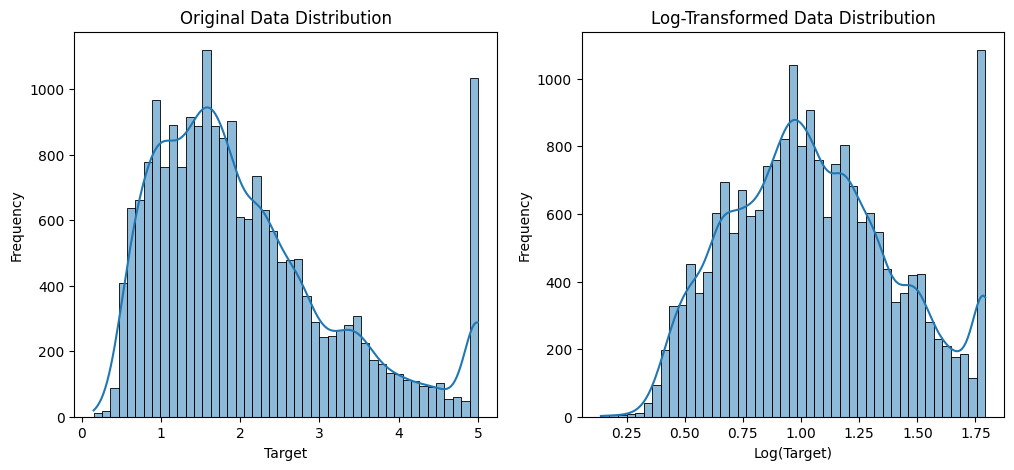

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 원본 데이터와 로그 변환 데이터 생성
original_data = df['Target']
log_transformed_data = np.log1p(original_data)  # 로그 변환 (로그 변환을 위해 1을 더해줍니다.)

# 1x2 서브플롯 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 원본 데이터의 분포
sns.histplot(original_data, kde=True, ax=axes[0])
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Frequency')

# 로그 변환 데이터의 분포
sns.histplot(log_transformed_data, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Data Distribution')
axes[1].set_xlabel('Log(Target)')
axes[1].set_ylabel('Frequency')

# 그래프 출력
plt.show()

# 로그변환된 내용이 더 고르게 출력됨을 확인.

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y

# log1p
- np.log1p 함수는 주어진 값에 1을 더한 후에 자연로그를 계산하는 함수.

### 특징
- 값이 0인 경우 오류 방지: 로그 변환은 0에 대해서는 정의되지 않습니다. 1을 더함으로써 값이 0일 때에도 로그를 계산할 수 있습니다.

- 음수 값에 대한 안전성 확보: 음수에 대한 로그 변환도 정의되지 않습니다. 1을 더함으로써 음수에 대한 로그 변환이 안전하게 이루어집니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('Target', axis=1)
y = df['Target']

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 타겟 로그변환
y_log = np.log1p(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=0)

# 모델 생성
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측 및 평가
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print('계수:', lin_reg.coef_.round(2))
print('절편:', lin_reg.intercept_.round(2))
print('MSE:', mse.round(2))
print('RMSE:', rmse.round(2))
print('R2:', r2.round(2))

계수: [ 0.23  0.02 -0.06  0.07  0.   -0.02 -0.35 -0.33]
절편: 1.06
MSE: 0.05
RMSE: 0.22
R2: 0.61


`lin_reg.intercept_`는 선형 회귀 모델에서의 절편(intercept)에 해당합니다. 선형 회귀 모델은 주어진 입력 변수에 대해 출력 변수를 예측하는데 사용되며, 이때 선형 함수의 방정식은 다음과 같습니다:

$y = mx + $(b)

여기서:
- $y$는 종속 변수(예측하려는 값),
- $x$는 독립 변수(입력 변수),
- $m$은 기울기(coefficient 또는 가중치),
- $(b)$는 절편(intercept)입니다.

`lin_reg.intercept_`는 이 선형 함수에서의 $(b)$에 해당합니다. 즉, 주어진 입력 변수의 값이 0일 때의 예측값입니다. 이 절편은 회귀 모델이 어느 정도의 상수를 가지고 있는지를 나타내며, 기울기와 함께 입력 변수에 대한 예측을 수행하는 데 사용됩니다.

선형 회귀 모델을 학습한 후에는 `lin_reg.intercept_`를 통해 이 절편 값을 확인할 수 있습니다.


### Q. y 데이터를 박스플롯으로 이상치를 확인, 이상치 제거 후 y분포와 y_log 분포 확인

<Axes: ylabel='Target'>

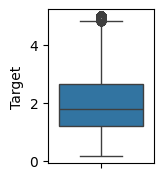

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y = df['Target']

# y 데이터 시각화 (Boxplot)
plt.figure(figsize=(3,2))
plt.subplot(1, 2, 1)
sns.boxplot(y=y)

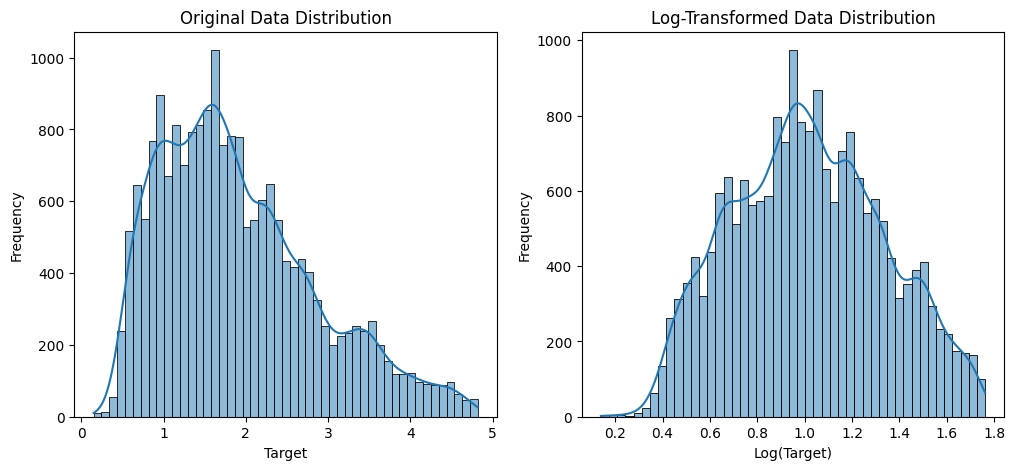

In [ ]:
# 이상치 제거
Q1 = y.quantile(0.25)  # 1분위수
Q3 = y.quantile(0.75)  # 3분위수
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(y > lower_bound) & (y < upper_bound)]
filtered_x = filtered_df.drop('Target', axis=1)
filtered_y = filtered_df['Target']

# 로그적용
y_log = np.log1p(filtered_y)

# 1x2 서브플롯 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 원본 데이터의 분포
sns.histplot(filtered_y, kde=True, ax=axes[0])
axes[0].set_title('Original Data Distribution')
axes[0].set_xlabel('Target')
axes[0].set_ylabel('Frequency')

# 로그 변환 데이터의 분포
sns.histplot(y_log, kde=True, ax=axes[1])
axes[1].set_title('Log-Transformed Data Distribution')
axes[1].set_xlabel('Log(Target)')
axes[1].set_ylabel('Frequency')

# 그래프 출력
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(filtered_x, filtered_y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# adjusted_r2
n = X_test.shape[0]  # 테스트 갯수
p = X_test.shape[1]  # 특성 갯수
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# cross_val_score
cv_scores = cross_val_score(model, filtered_x, filtered_y, cv=5, scoring='neg_mean_squared_error')
# MSE는 낮을수록 좋은데 사이킷런은 기본적으로 높은값을 취하는 알고리즘.
# neg_mean_squared_error: MSE를 음수로 변경후 높은값(0과 가까운 수)를 취한다.

print("중간 cv 확인: ", cv_scores)

cv_rmse = np.sqrt(-cv_scores).mean()
# 각 폴드에서 계산한 음수 MSE에 대해 제곱근을 취하고 이를 평균내어 최종적인 교차 검증 RMSE를 계산합니다.

# Print
print("Mean squared error:", mse.round(4))
print("Mean absolute error:", mae.round(4))
print("R-squared:", r2.round(4))
print("R-adjusted_r2:", adjusted_r2.round(4))
print("cross_val_score:", cv_rmse.round(4))

# 이상치 삭제 전 평가값
# Mean squared error: 0.5559
# Mean absolute error: 0.5332
# R-squared: 0.5758
# R-adjusted_r2: 0.575
# cross_val_score: 0.7459

중간 cv 확인:  [-0.3889098  -0.484308   -0.44851028 -0.36996069 -0.38837348]
Mean squared error: 0.3688
Mean absolute error: 0.4594
R-squared: 0.6013
R-adjusted_r2: 0.6004
cross_val_score: 0.6441


## 이상치 처리 여부 판단

### MSE 및 R-제곱 이해

- **MSE (평균 제곱 오차):** 관찰된 실제 결과와 모델 예측 간의 평균 제곱 차이를 측정합니다. 낮은 MSE는 더 작은 평균 오류를 나타냅니다.
  
- **R-제곱:** 독립 변수에서 예측 가능한 종속 변수의 분산 비율을 측정합니다. 모델의 예측 정확도를 나타냅니다. 높은 R-제곱은 높은 설명력을 의미하지만 항상 모델의 품질을 나타내지 않습니다.

### 이상치의 영향

- **이상치 제거:** 이상치를 제거하면 MSE가 감소하고 모델이 더 정확해질 수 있습니다. 그러나 특정 경우에는 이상치가 데이터의 중요한 부분일 수 있어 R-제곱이 낮아질 수 있습니다.

### 결정 기준

- **모델 목적:** 모델의 목적에 따라 MSE나 R-제곱 중 어느 지표에 우선순위를 둘지 결정합니다.
  
- **데이터 표현:** 데이터의 특성에 따라 이상치를 유지하거나 제거해야 할 수 있습니다.

### 도메인 지식

- **도메인 이해:** 도메인 전문가의 통찰력은 이상치가 변칙인지 아니면 데이터의 필수 부분인지를 판단하는데 도움이 됩니다.

### 대체 접근 방식

- 최종 결정은 통계적 증거, 모델 목적, 도메인 지식, 실제 사용 사례 등을 고려하여 이상치를 유지하거나 제거하는 것이 좋습니다.

이상치 처리 여부에 대한 결정은 단순한 규칙이 아니라 다양한 요소를 고려하고 종종 도메인 전문가와의 상담이 필요합니다.


## 음수 MSE("neg_mean_squared_error")의 이유

- scikit-learn에서는 'cross_val_score'와 같은 함수가 성능이 좋을수록 값이 커지는 관례를 따릅니다. 이 관례는 일반적인 지표(정확도 등)에서는 높은 값이 더 좋은 성능을 나타냅니다.
  
- 그러나 MSE와 같은 손실 함수는 값이 낮을수록 더 좋은 성능을 의미하므로, 이 관례와 일치하지 않습니다.
  
- 따라서 scikit-learn은 MSE를 부정형으로 사용하여, 낮은 MSE가 높은 성능을 의미하도록 합니다.
  
- 부정형 MSE를 사용하면 MSE 최소화 문제가 scikit-learn의 모델 평가 도구 프레임워크에 더 잘 맞게 됩니다.


In [ ]:
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################

### 내용 구분용 공백

## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모델의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀

**릿지 회귀 (Ridge Regression):**
- L2 규제를 적용한 회귀로, W의 제곱에 패널티를 부여하여 회귀 계수 값의 크기를 감소시킵니다.
- 릿지 회귀는 모든 특성을 적용하되 패널티를 적용하여 특성들 간의 상관관계를 고려합니다.

**라쏘 회귀 (Lasso Regression):**
- L1 규제를 적용한 회귀로, W의 절댓값에 패널티를 부여하여 일부 특성의 회귀 계수를 정확히 0으로 만듭니다.
- 라쏘 회귀는 특성 선택의 효과를 가지며, 적절한 특성만을 사용하여 모델을 구성합니다.

또한, 두 규제를 혼합한 엘라스틱넷(Elastic Net) 회귀도 있습니다. 이는 L2와 L1 규제를 함께 적용하여 릿지와 라쏘의 특성을 모두 갖습니다.

이러한 규제 선형 모델은 alpha값을 조절하여 패널티의 강도를 조절합니다. alpha값을 크게 하면 패널티가 강해져 회귀 계수의 크기가 작아지게 되며, alpha값을 작게 하면 패널티가 약해져 회귀 계수가 커질 수 있습니다. 따라서 적절한 alpha값을 찾아 모델을 튜닝하는 것이 중요합니다.


## 회귀 모델에서의 가중치 (회귀 계수)

각 회귀 모델에서 $W$는 회귀 계수 또는 가중치를 나타냅니다. 이는 입력 특성(feature)들과 관련이 있으며, 선형 회귀에서는 각 특성의 영향력을 나타내는 값입니다.

선형 회귀 모델에서 일반적으로 다음과 같은 방정식을 가집니다:

$[ y = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 + \ldots + w_n \cdot x_n $]

여기서:

- $y$는 종속 변수(예측하려는 값),
- $x_1, x_2, \ldots, x_n$은 독립 변수(입력 변수),
- $w_0, w_1, \ldots, w_n$은 각 독립 변수의 가중치 또는 회귀 계수입니다.

이 가중치들은 모델이 학습하는 파라미터로, 학습 데이터를 기반으로 최적화되어 예측을 수행하는 데 사용됩니다. $w_0$는 절편(intercept) 또는 편향(bias)이라고도 부르며, $w_1, w_2, \ldots, w_n$은 각각의 독립 변수의 영향을 나타냅니다.

규제 선형 모델에서는 이 가중치들이 큰 값을 가지는 것을 제어하여 모델이 너무 복잡해지거나 과적합되는 것을 방지하려고 합니다. 이를 위해 L2 규제, L1 규제, 또는 둘을 결합한 Elastic Net 규제를 사용합니다. 이 규제는 비용 함수에 가중치의 크기를 조절하는 항을 추가하여 모델을 더욱 일반화시킵니다.


L1 규제 (Lasso 회귀)

- L1 규제는 Lasso(L1) 회귀에서 사용. 이 규제 방식은 모델의 손실 함수에 가중치의 절대값(|w|)의 합을 추가. 수학적으로 L1 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑∣w∣) $

  α는 규제 강도를 조절하는 매개변수입니다.
- L1 규제의 주요 특징은 모델의 일부 가중치를 정확히 0으로 만들 수 있다는 것. 이는 불필요한 특성의 가중치를 제거하여 모델을 단순화하고, 결과적으로 특성 선택(feature selection)의 효과를 가지게 된다.

L2 규제 (Ridge 회귀)
- L2 규제는 Ridge(L2) 회귀에서 사용. 이 규제는 모델의 손실 함수에 가중치의 제곱의 합을 추가. 수학적으로 L2 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑w^2) $

  α 역시 규제 강도를 조절하는 매개변수이다.
- L2 규제의 주요 특징은 가중치의 크기를 제한하여 모델의 복잡도를 감소시키는 것. L2 규제는 가중치를 완전히 0으로 만들지는 않지만, 가중치 값을 줄여 과적합을 방지하는 데 도움을 준다.

요약

- Lasso 회귀(L1 규제): 불필요한 특성의 가중치를 0으로 만들어 특성 선택의 효과를 가짐.
- Ridge 회귀(L2 규제): 모든 가중치를 비슷한 수준으로 작게 유지하여 과적합 방지.
- 규제 강도: α는 모델의 복잡도와 규제 사이의 균형을 조절하는 중요한 매개변수로, 적절한 값을 찾기 위해 교차 검증 등의 방법을 사용할 수 있다.

In [ ]:
# GPT 예시

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# 라쏘 회귀
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# 엘라스틱넷 회귀
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)

# 성능 평가
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)
print("ElasticNet MSE:", elastic_net_mse)

Ridge MSE: 0.5558034669932196
Lasso MSE: 0.9380337514945428
ElasticNet MSE: 0.7645556403971131


In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# 데이터 로드
boston = fetch_openml(name="Boston", version=1)

# 데이터 프레임으로 변환
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target

boston_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [ ]:
for col in boston_df.columns:
  if boston_df[col].dtype.name == "category":
    # category > 수치
    boston_df[col] = boston_df[col].cat.codes
    # 데이터 타입을 float
    boston_df[col] = boston_df[col].astype(float)

In [ ]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop(['Price'], axis=1, inplace=False)
y_target = boston_df['Price']

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE scores : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores : [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE scores : 5.568


In [ ]:
alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {}일 때 5 folds의 평균 RMSE : {:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 5.717
alpha 0.1일 때 5 folds의 평균 RMSE : 5.700
alpha 1일 때 5 folds의 평균 RMSE : 5.641
alpha 10일 때 5 folds의 평균 RMSE : 5.568
alpha 100일 때 5 folds의 평균 RMSE : 5.499


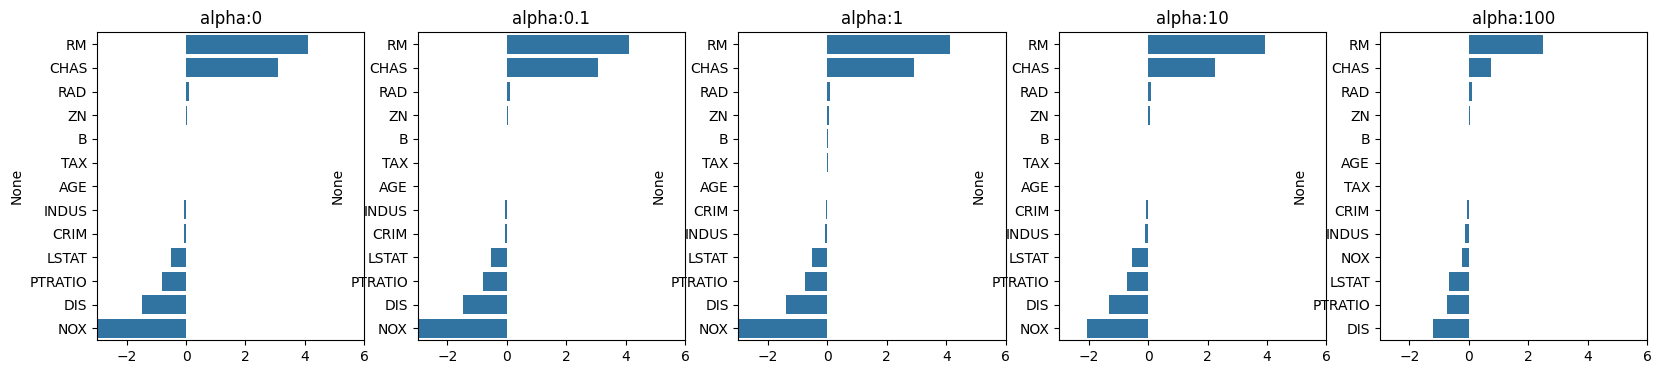

In [ ]:
# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐.
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(20,4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)

  coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
  colname = "alpha:"+str(alpha)
  coeff_df[colname] = coeff

  coeff = coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [ ]:
rigde_alphas = [0, 0.1, 1, 10, 100]
sort_columns = "alpha:"+str(rigde_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,4.113720,4.118217,4.133037,3.948086,2.506996
CHAS,3.083844,3.064099,2.926289,2.241946,0.743225
RAD,0.097228,0.096776,0.094484,0.094287,0.099261
ZN,0.042019,0.042188,0.043162,0.045368,0.049593
B,0.008355,0.008411,0.008710,0.009040,0.008208
TAX,0.001546,0.001373,0.000422,-0.000939,-0.001055
AGE,-0.004222,-0.005011,-0.009245,-0.013267,-0.000336
INDUS,-0.054296,-0.057680,-0.076297,-0.103658,-0.119831
CRIM,-0.065053,-0.064891,-0.063989,-0.062459,-0.058398
LSTAT,-0.515940,-0.517093,-0.524246,-0.550883,-0.658937


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

def get_linear_reg_eval(model_name, alphas, X, y, verbose=True):
  coeff_df = pd.DataFrame()
  if model_name not in ['Ridge', 'Lasso', 'ElasticNet']:
      print("Invalid model name. Please choose from 'Ridge', 'Lasso', 'ElasticNet'.")
      return

  for alpha in alphas:
    # 모델 선택
    if model_name == 'Ridge':
        model = Ridge(alpha=alpha)
    elif model_name == 'Lasso':
        model = Lasso(alpha=alpha)
    elif model_name == 'ElasticNet':
        model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        # l1_ratio는 ElasticNet에서만 사용하는 매개변수
        # l1_ratio는 l1 규제 사용 비율을 입력하여 조정

    neg_mse_scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print('알파가 {}일때 5폴드 세트의 평균 RMSE: {:3f}'.format(alpha, avg_rmse))
    model.fit(X, y)
    coeff = pd.Series(data=model.coef_, index=X.columns)
    colname = "alpha:"+str(alpha)
    coeff_df[colname] = coeff

  return coeff_df

## 알파 (Alpha) 소개

**알파 (Alpha)**는 선형 회귀 모델에서 사용되는 규제 강도를 나타내는 매개변수입니다. 알파는 다음과 같은 특징을 가지고 있습니다:

- **알파의 범위:** 알파는 0 이상의 값으로 설정됩니다.
- **규제의 유무:** 알파가 0인 경우, 규제가 적용되지 않아 모델이 자유롭게 학습합니다.
- **규제의 강도:** 알파가 증가함에 따라 규제가 강화되며, 가중치에 대한 제약이 커집니다.

알파를 조절하여 모델의 복잡도를 조절할 수 있으며, 적절한 알파 값의 선택은 모델의 성능과 일반화 능력에 영향을 미칩니다. 너무 작은 알파는 과적합을 초래할 수 있고, 너무 큰 알파는 과소적합을 유발할 수 있으므로, 교차 검증 등을 통해 최적의 알파 값을 찾는 것이 중요합니다.


In [ ]:
# 라쏘 회귀
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', alphas=lasso_alphas, X=X_data, y=y_target, verbose=True)
coeff_lasso_df

알파가 0.07일때 5폴드 세트의 평균 RMSE: 5.639753
알파가 0.1일때 5폴드 세트의 평균 RMSE: 5.639696
알파가 0.5일때 5폴드 세트의 평균 RMSE: 5.721166
알파가 1일때 5폴드 세트의 평균 RMSE: 5.910565
알파가 3일때 5폴드 세트의 평균 RMSE: 6.225663


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060899,-0.060272,-0.047400,-0.027592,-0.000000
ZN,0.044466,0.044379,0.043056,0.043497,0.036646
INDUS,-0.100872,-0.096489,-0.065961,-0.035079,-0.000000
CHAS,1.814288,1.342789,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,4.041496,3.958515,2.765466,1.230766,0.000000
AGE,-0.014060,-0.012398,0.001813,0.018729,0.042256
DIS,-1.231606,-1.215476,-0.987331,-0.693531,-0.000000
RAD,0.073730,0.067353,0.000000,0.000000,0.000000
TAX,-0.001620,-0.001739,-0.002674,-0.003469,-0.005808


In [ ]:
# 엘라스틱넷 회귀
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', alphas=lasso_alphas, X=X_data, y=y_target, verbose=True)
coeff_elastic_df

알파가 0.07일때 5폴드 세트의 평균 RMSE: 5.590359
알파가 0.1일때 5폴드 세트의 평균 RMSE: 5.580020
알파가 0.5일때 5폴드 세트의 평균 RMSE: 5.595026
알파가 1일때 5폴드 세트의 평균 RMSE: 5.773112
알파가 3일때 5폴드 세트의 평균 RMSE: 6.137959


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.060944,-0.060245,-0.049926,-0.035752,-0.000000
ZN,0.045591,0.045875,0.046041,0.045563,0.036390
INDUS,-0.105402,-0.103734,-0.090124,-0.063498,-0.000000
CHAS,1.619638,1.247154,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.817480,3.653256,2.103637,1.070492,0.000000
AGE,-0.012495,-0.010434,0.006584,0.019592,0.042696
DIS,-1.244686,-1.231931,-1.028697,-0.771315,-0.030723
RAD,0.081576,0.077310,0.000000,0.000000,0.000000
TAX,-0.001503,-0.001560,-0.002155,-0.002844,-0.005168


## 엘라스틱넷 (Elastic Net) 개념

**엘라스틱넷(Elastic Net)**은 선형 회귀 모델에서 사용되는 규제 방법 중 하나로, L1 규제와 L2 규제를 결합한 모델입니다. L1 규제는 가중치의 절대값 합, L2 규제는 가중치의 제곱 합을 추가하여 모델을 규제합니다. 따라서 Elastic Net은 L1 규제와 L2 규제를 혼합하여 사용하며, 두 규제의 강도를 조절하는 두 개의 매개변수인 $ \alpha $와 $ \rho $를 사용합니다.

### 목적 함수

엘라스틱넷의 목적 함수는 다음과 같이 표현됩니다.

$[ \text{비용 함수 목표} = \text{최소제곱손실} + \alpha \left( \rho \sum |w| + \frac{1}{2}(1 - \rho) \sum w^2 \right) $]

여기서,
- $ \alpha $는 전체 규제의 강도를 조절하는 매개변수입니다. $ \alpha $가 클수록 규제가 강화됩니다.
- $ \rho $는 L1 규제와 L2 규제의 비율을 나타내며, $ 0 \leq \rho \leq 1 $입니다. $ \rho = 0 $이면 L2 규제와 동일하며, $ \rho = 1 $이면 L1 규제와 동일합니다.

### 특징

1. **L1, L2 규제의 혼합:** L1 규제는 특정 가중치를 정확히 0으로 만들 수 있어 특성 선택의 효과를 가지며, L2 규제는 가중치를 줄여 과적합을 방지합니다. Elastic Net은 두 규제를 조합하여 이점을 모두 취할 수 있습니다.
   
2. **다중공선성 해결:** Ridge 회귀와 마찬가지로 다중공선성 문제를 해결할 수 있습니다.

3. **적절한 규제 강도 조절:** $ \alpha $와 $ \rho $를 조절하여 모델의 복잡도를 조절할 수 있습니다. 교차 검증 등을 통해 최적의 매개변수를 찾아야 합니다.

엘라스틱넷은 특히 특성이 많은 데이터나 다중공선성이 존재하는 경우에 유용하며, L1 규제만 사용하는 Lasso나 L2 규제만 사용하는 Ridge에 비해 더 유연한 모델을 제공합니다.


In [ ]:
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################

### 내용 구분용 공백

### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = fetch_openml(name="Boston", version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS', 'RAD'], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


이 데이터는 사이킷런에서 제공하는 보스턴 주택가격 데이터셋으로, 주택가격에 영향을 미치는 여러 특성들을 담고 있습니다. 각 열의 이름과 설명은 다음과 같습니다:

1. **CRIM**: 범죄율 (per capita crime rate by town)
2. **ZN**: 25,000 평방피트당 주거지 비율 (proportion of residential land zoned for lots over 25,000 sq. ft.)
3. **INDUS**: 비소매 상업지구 비율 (proportion of non-retail business acres per town)
4. **NOX**: 산화질소 농도 (nitric oxides concentration, parts per 10 million)
5. **RM**: 주택당 평균 방 갯수 (average number of rooms per dwelling)
6. **AGE**: 1940년 이전에 건설된 주택 비율 (proportion of owner-occupied units built prior to 1940)
7. **DIS**: 직업센터까지의 가중 거리 (weighted distances to five Boston employment centers)
8. **TAX**: 재산세율 (full-value property tax rate per $10,000)

9. **PTRATIO**: 학생 대 교사 비율 (pupil-teacher ratio by town)

10. **B**: 1000(Bk - 0.63)^2, 여기서 Bk는 흑인의 비율 (where Bk is the proportion of Black residents)
11. **LSTAT**: 낮은 신분의 인구 비율 (percentage of lower status of the population)
12. **PRICE**: 주택 가격 (median value of owner-occupied homes in $1000s) - 이것이 예측하려는 타겟 변수입니다.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from math import sqrt

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
rf_reg = rf.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, pred_rf)
rmse = sqrt(mse)
r2 = r2_score(y_test, pred_rf)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MSE: 9.317095427894754
RMSE: 3.0523917553116857
R2: 0.8749602958125839


In [ ]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis=1)
rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_data, y_target, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores :', np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores :', np.round(rmse_scores,3))
print('5 folds의 평균 RMSE scores : {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores : [ -7.977 -13.265 -20.579 -46.291 -18.92 ]
5 folds의 개별 RMSE scores : [2.824 3.642 4.536 6.804 4.35 ]
5 folds의 평균 RMSE scores : 4.431


In [ ]:
from sklearn.model_selection import cross_val_score
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print(f'###{model.__class__.__name__}')
  print(f'5 교차 검증의 개별 Negaive MSE Scores: {np.round(neg_mse_scores, 2)}')
  print(f'5 교차 검증의 개별 RMSE Scores: {np.round(rmse_scores, 2)}')
  print(f'5 교차 검증의 평균 RMSE: {avg_rmse:.3f}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
y_target = boston_df.PRICE
X_data = boston_df.drop(['PRICE'], axis=1)

rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
lr_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

models = [rf_reg, lr_reg, dt_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:
  get_model_cv_prediction(model, X_data, y_target)

###RandomForestRegressor
5 교차 검증의 개별 Negaive MSE Scores: [ -7.98 -13.27 -20.58 -46.29 -18.92]
5 교차 검증의 개별 RMSE Scores: [2.82 3.64 4.54 6.8  4.35]
5 교차 검증의 평균 RMSE: 4.431
###LinearRegression
5 교차 검증의 개별 Negaive MSE Scores: [-12.99 -22.98 -30.85 -86.5  -23.08]
5 교차 검증의 개별 RMSE Scores: [3.6  4.79 5.55 9.3  4.8 ]
5 교차 검증의 평균 RMSE: 5.611
###DecisionTreeRegressor
5 교차 검증의 개별 Negaive MSE Scores: [-11.94 -36.25 -33.48 -46.05 -58.12]
5 교차 검증의 개별 RMSE Scores: [3.46 6.02 5.79 6.79 7.62]
5 교차 검증의 평균 RMSE: 5.935
###GradientBoostingRegressor
5 교차 검증의 개별 Negaive MSE Scores: [ -8.43 -14.13 -20.64 -39.88 -14.24]
5 교차 검증의 개별 RMSE Scores: [2.9  3.76 4.54 6.32 3.77]
5 교차 검증의 평균 RMSE: 4.259
###XGBRegressor
5 교차 검증의 개별 Negaive MSE Scores: [ -7.74 -33.56 -26.22 -45.69 -22.73]
5 교차 검증의 개별 RMSE Scores: [2.78 5.79 5.12 6.76 4.77]
5 교차 검증의 평균 RMSE: 5.045
###LGBMRegressor
5 교차 검증의 개별 Negaive MSE Scores: [ -9.21 -20.12 -19.57 -41.56 -22.29]
5 교차 검증의 개별 RMSE Scores: [3.04 4.49 4.42 6.45 4.72]
5 교차 검증의 평균 RMSE: 4.62

<Axes: xlabel='None', ylabel='None'>

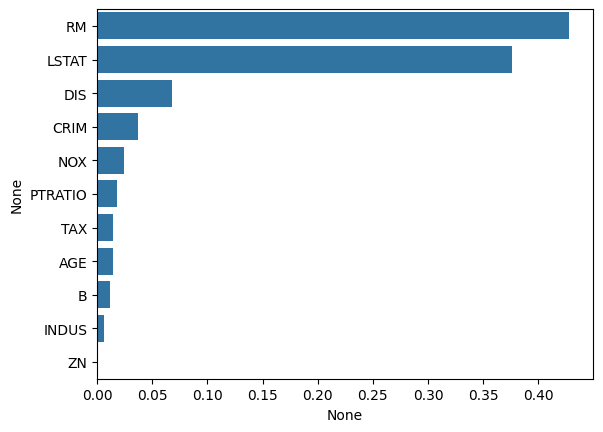

In [ ]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<Axes: xlabel='None', ylabel='None'>

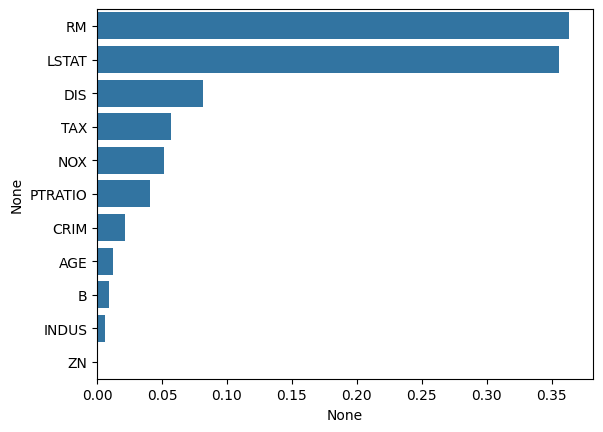

In [ ]:
xgb = XGBRegressor(n_estimators=1000)

xgb.fit(X_data, y_target)

feature_series = pd.Series(data=xgb.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [ ]:
# sample() > 판다스에서 무작위로 샘플 추출
boston_df.sample(n=3, random_state=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
307,0.04932,33.0,2.18,0.472,6.849,70.3,3.1827,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.448,6.030,85.5,5.6894,233.0,17.9,392.74,18.80,16.6


(100, 2)


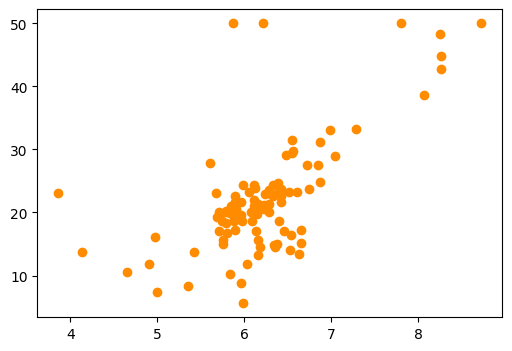

In [ ]:
import matplotlib.pyplot as plt

bostonDF_sample = boston_df[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure(figsize=(6,4))
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

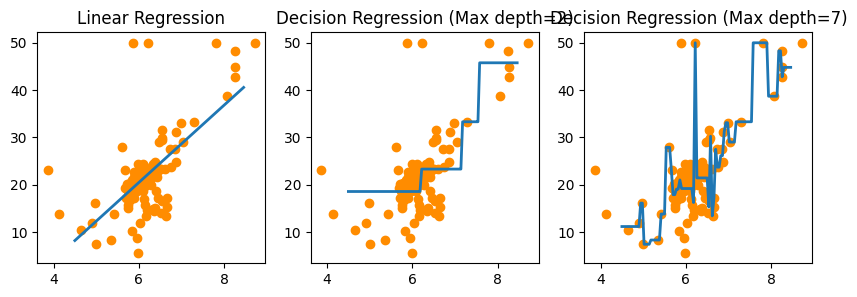

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,3), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Regression (Max depth=2)')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_dt2, label='Max depth=2', linewidth=2)

ax3.set_title('Decision Regression (Max depth=7)')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_dt7, label='Max depth=7', linewidth=2)
# max7의 그래프를 보면 이상치까지 학습하는 것을 볼 수 있음.

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

In [ ]:
# Q. 주어진 data로 dt회귀트리 모델로 모델링 및 MAE로 평가 수행.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = {
    'mileage': [10000, 20000, 30000, 40000, 50000],
    'year': [2015, 2014, 2013, 2012, 2011],
    'price': [15000, 12500, 10000, 7500, 5000]
}

df = pd.DataFrame(data)

In [ ]:
X = df[['mileage', 'year']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = DecisionTreeRegressor(random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 2500.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

data = {
    'mileage': [10000, 20000, 30000, 40000, 50000],
    'year': [2015, 2014, 2013, 2012, 2011],
    'price': [15000, 12500, 10000, 7500, 5000]
}

df = pd.DataFrame(data)

X = df[['mileage', 'year']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeRegressor(random_state=42)

# GridSearchCV를 위한 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [1,2,3,4,5],
    'min_samples_split': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

pred_best_model = best_model.predict(X_test)

mae_best_model = mean_absolute_error(y_test, pred_best_model)

# 결과 출력
print('Best Hyperparameters:', best_params)
print('Mean Absolute Error (Best Model):', mae_best_model)

Best Hyperparameters: {'max_depth': 1, 'min_samples_split': 2}
Mean Absolute Error (Best Model): 2500.0


In [5]:
# Q_0129. 주어진 data에 대해여 회귀모델을 사용하여 에너지 사용량을 예측하는 모델을
# Xgbregressor, Lightbmregressor 모델을 이용하여 모델링 및 평가(MAE, MSE, RMSE)를 수행하세요.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

np.random.seed(42)

data_size = 1000

data = {
    'area': np.random.uniform(1000, 3000, data_size),
    'type': np.random.randint(0, 2, data_size),
    'location': np.random.randint(0, 3, data_size),
    'energy_usage': np.random.uniform(200, 600, data_size)  # kWh
}

df.head()

,area,type,location,energy_usage
0,1749.080238,0,1,561.443138
1,2901.428613,1,1,293.105259
2,2463.987884,1,0,522.958412
3,2197.316968,1,0,223.637556
4,1312.037281,1,1,559.538955


In [7]:
# 전처리
X = df[['area', 'type', 'location']]
y = df['energy_usage']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 훈련
# objective 매개변수는 모델이 최소화하려는 손실함수나 최적화할 목표
# xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

# LightGBM 모델 훈련
# lgbm_regressor = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor = LGBMRegressor(objecive='regression', n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_regressor.fit(X_train, y_train)

# 예측 수행
y_pred_xgb = xgb_regressor.predict(X_test)
y_pred_lgbm = lgbm_regressor.predict(X_test)

# 평가 지표 계산 (MAE, MSE, RMSE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

# 결과 출력
print("XGBRegressor 평가 지표:")
print(f"MAE: {mae_xgb:.2f}")
print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")

print("\nLightGBMRegressor 평가 지표:")
print(f"MAE: {mae_lgbm:.2f}")
print(f"MSE: {mse_lgbm:.2f}")
print(f"RMSE: {rmse_lgbm:.2f}")

XGBRegressor 평가 지표:
MAE: 100.91
MSE: 14651.81
RMSE: 121.04

LightGBMRegressor 평가 지표:
MAE: 97.31
MSE: 13658.11
RMSE: 116.87


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################
#######          #######           #######          #######           #######          #######           #######          #######           #######          #######
####################################################################################################################################################################

### 내용 구분용 공백

#### 서포트 벡터 회귀(Support Vector Regression, SVR)
- 서포트 벡터 머신(SVM)의 개념을 회귀 문제에 적용한 것입니다.

- SVM이 두 클래스 사이의 마진을 최대화하는 방식으로 분류 문제를 해결하는 것과 달리, SVR은 이 마진 안에 가능한 한 많은 데이터 포인트가 포함되도록 회귀선을 조정한다.

- SVR은 선형 회귀뿐만 아니라 비선형 회귀 문제에도 적용될 수 있다. 비선형 문제에서는 커널 트릭을 사용하여 데이터를 고차원으로 매핑하고, 이러한 고차원 공간에서 선형 회귀를 수행한다.

- SVR은 모델의 복잡성을 제어하는 데 중요한 두 가지 매개변수, 즉 C와 epsilon을 가지고 있습니다. C는 패널티 항의 강도를 제어하고, epsilon은 마진의 폭을 제어합니다. 이 매개변수들은 모델의 성능과 과적합 문제를 제어하는 데 중요한 역할을 한다.

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = fetch_openml(name="Boston", version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
# boston_df.drop(['CHAS', 'RAD'], axis=1, inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 필요한 feature이면 dtype 변환
for col in boston_df.columns:
  if boston_df[col].dtype.name == 'category':
    # category 타입을 먼저 수치형으로 변환
    boston_df[col] = boston_df[col].cat.codes
    # 데이터 타입을 float로 변경
    boston_df[col] = boston_df[col].astype(float)

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

X = boston_df.drop(['PRICE'], axis=1)
y = boston_df.PRICE

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# SVR 모델 생성
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, pred_svr)
rmse_svr = mse_svr**0.5

# 결과 출력
print('MSE:', mse_svr.round(3))
print('RMSE:', rmse_svr.round(3))
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print('예측값:', svr_model.predict([test_data])[0].round(3))

MSE: 25.53
RMSE: 5.053
예측값: 19.143


In [ ]:
# GPT 최적화 분석
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

X = boston_df.drop(['PRICE'], axis=1)
y = boston_df.PRICE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVR 모델 생성
svr = SVR()

# 하이퍼파라미터 탐색을 위한 그리드 설정
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'rbf', 'poly']}

# 그리드 서치를 통한 최적의 조건 탐색
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적의 모델 얻기
best_svr = grid_search.best_estimator_

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 테스트 데이터에 대한 예측
y_pred = best_svr.predict(X_test_scaled)

# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set: ", rmse)

# RMSLE 계산
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
print("Root Mean Squared Logarithmic Error (RMSLE) on Test Set: ", rmsle)

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE) on Test Set: ", mae)

# 서포트 벡터의 개수와 마진 출력
print("Number of Support Vectors: ", best_svr.support_vectors_.shape[0])
print("Margin: ", 2 / np.sqrt(np.sum(best_svr.dual_coef_ ** 2)))

Best Parameters:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Root Mean Squared Error (RMSE) on Test Set:  3.5808177358420483
Root Mean Squared Logarithmic Error (RMSLE) on Test Set:  0.16274128915013422
Mean Absolute Error (MAE) on Test Set:  2.099035600410969
Number of Support Vectors:  388
Margin:  0.0014217573647690833


1. **선형 커널 (`kernel='linear'')**:
   - 데이터가 선형적으로 분리될 수 있는 경우에 사용합니다.
   - 특히 특성이 많고 샘플 수가 적은 경우에 유용할 수 있습니다.

2. **RBF 커널 (`kernel='rbf'')**:
   - 대부분의 경우에서 잘 작동하며, 기본값으로 자주 사용됩니다.
   - 비선형 결정 경계를 만들기 위한 강력한 도구로 알려져 있습니다.
   - 하지만 하이퍼파라미터인 C와 gamma의 조정이 필요합니다.

3. **다항 커널 (`kernel='poly'')**:
   - 다항 특성을 고려할 때 사용됩니다.
   - 다항 커널의 경우에는 다항식의 차수(degree)를 조절할 수 있습니다.
   - 차수가 높을수록 모델이 더 복잡한 결정 경계를 학습할 수 있지만, 과적합의 위험이 있습니다.
